<a href="https://colab.research.google.com/github/thgemanuel/Exercicio-3-Topicos-em-Inteligencia-Computacional/blob/main/Regressao_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 2 - Envie nesta atividade a gravação com a explicação da solução do exercício e o link para o código do exercício 2 da semana.

Aluno: Thiago Emanuel Silva Antunes Lopes


# Exercício

Considere, pelo menos, outras duas características da base de dados Diabetes, repita o exemplo:

1.   Para cada característica individualmente compare o resultado com a característica "age", visualmente (gráfico) e por meio duas medidas de erro: $abs(y_{teste} - y_{predito})$) e outra medida da escolha de vocês.
2.   Adicionalmente, combine as duas características (regressão com duas variáveis) e analise o resultado com base nas duas medidas de erro no item anterior.


O código deve ser enviado ao Github e postado no sala de aula.


# **Base de dados real**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_diabetes
import statsmodels.api as sm

# Load the diabetes dataset
diabetes = load_diabetes()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas

tabela = pandas.DataFrame(diabetes.data)
tabela.columns = diabetes.feature_names
tabela.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [3]:
#mostra uma quantidade maior de linhas, no caso, 10 linhas.
tabela.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [4]:
# e a progressao da doenca
tabela['y'] = diabetes.target
tabela.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


# Características escolhidas:


1.   Sexo
2.   Índice de massa corporal
3.   Pressão arterial



In [10]:
#X_sex = tabela['sex']
#X_treinamento_sex = X_sex[:-20].array.to_numpy().reshape(-1,1)
##Para validar o modelo, usei os 20 últimos registros
#X_teste_sex = X_sex[-20:].array.to_numpy().reshape(-1,1)

X_bmi = tabela['bmi']
X_treinamento_bmi = X_bmi[:-20].array.to_numpy().reshape(-1,1)
#Para validar o modelo, usei os 20 últimos registros
X_teste_bmi = X_bmi[-20:].array.to_numpy().reshape(-1,1)

X_bp = tabela['bp']
X_treinamento_bp = X_bp[:-20].array.to_numpy().reshape(-1,1)
#Para validar o modelo, usei os 20 últimos registros
X_teste_bp = X_bp[-20:].array.to_numpy().reshape(-1,1)

X_bmi_bp = tabela[['bmi','bp']]
X_treinamento_bmi_bp = X_bmi_bp[:-20].array.to_numpy().reshape(-1,1)
#Para validar o modelo, usei os 20 últimos registros
X_teste_bmi_pb = X_bmi_bp[-20:].array.to_numpy().reshape(-1,1)

y = tabela['y']
#mesma coisa aqui, porém, para o target (coluna y)
y_treinamento = y[:-20]
y_teste = y[-20:].array.to_numpy().reshape(-1,1)

#cria o modelo de regressão linear
#regr_sex = linear_model.LinearRegression()

# treina o modelo com os dados treinamento
#regr_sex.fit(X_treinamento_sex, y_treinamento)

#cria o modelo de regressão linear
regr_bmi = linear_model.LinearRegression()

# treina o modelo com os dados treinamento
regr_bmi.fit(X_treinamento_bmi, y_treinamento)

#cria o modelo de regressão linear
regr_bp = linear_model.LinearRegression()

# treina o modelo com os dados treinamento
regr_bp.fit(X_treinamento_bp, y_treinamento)

#cria o modelo de regressão linear
regr_bmi_bp = linear_model.LinearRegression()

# treina o modelo com os dados treinamento
regr_bmi_bp.fit(X_treinamento_bmi_bp, y_treinamento)

#print('-----------------------------------------------')
##coeficientes b1
#print('Coeficiente sex b1: \n', regr_sex.coef_)
##intercepto b0
#print('Coeficiente sex b0: \n', regr_sex.intercept_)
#print('-----------------------------------------------')
print('-----------------------------------------------')
#coeficientes b1
print('Coeficiente bmi b1: \n', regr_bmi.coef_)
#intercepto b0
print('Coeficiente bmi b0: \n', regr_bmi.intercept_)
print('-----------------------------------------------')
print('-----------------------------------------------')
#coeficientes b1
print('Coeficiente bp b1: \n', regr_bp.coef_)
#intercepto b0
print('Coeficiente bp b0: \n', regr_bp.intercept_)
print('-----------------------------------------------')
print('-----------------------------------------------')
#coeficientes b1
print('Coeficiente bp b1: \n', regr_bmi_bp.coef_)
#intercepto b0
print('Coeficiente bp b0: \n', regr_bmi_bp.intercept_)
print('-----------------------------------------------')


AttributeError: ignored

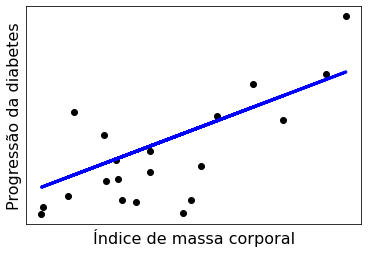

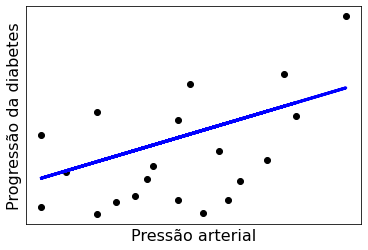

In [6]:
## Predição/validação
#diabetes_y_pred_sex = regr_sex.predict(X_teste_sex)
##plota os dados reais
#plt.scatter(X_teste_sex,y_teste,  color='black')
## plota os dados preditos
#plt.plot(X_teste_sex, diabetes_y_pred_sex, color='blue', linewidth=3)
#
#plt.xticks(())
#plt.yticks(())
#plt.xlabel("Sexo", size = 16,)
#plt.ylabel("Progressão da diabetes", size = 16)
#plt.show()

# Predição/validação
diabetes_y_pred_bmi = regr_bmi.predict(X_teste_bmi)
#plota os dados reais
plt.scatter(X_teste_bmi,y_teste,  color='black')
# plota os dados preditos
plt.plot(X_teste_bmi, diabetes_y_pred_bmi, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("Índice de massa corporal", size = 16,)
plt.ylabel("Progressão da diabetes", size = 16)
plt.show()

# Predição/validação
diabetes_y_pred_bp = regr_bp.predict(X_teste_bp)
#plota os dados reais
plt.scatter(X_teste_bp,y_teste,  color='black')
# plota os dados preditos
plt.plot(X_teste_bp, diabetes_y_pred_bp, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("Pressão arterial", size = 16,)
plt.ylabel("Progressão da diabetes", size = 16)
plt.show()

# Predição/validação
diabetes_y_pred_bmi_bp = regr_bmi_bp.predict(X_bmi_bp)
#plota os dados reais
plt.scatter(X_bmi_bp,y,  color='black')
# plota os dados preditos
plt.plot(X_bmi_bp, diabetes_y_pred_bmi_bp, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("IMC e Pressão arterial", size = 16,)
plt.ylabel("Progressão da diabetes", size = 16)
plt.show()

Funcao para medir acurácia e avaliar metodos de regressão

In [7]:
from sklearn.metrics import explained_variance_score, mean_absolute_error

def test_score(y_test, y_pred):
    acuracia = explained_variance_score(y_test, y_pred) * 100
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    print(f"""Acurácia: {acuracia:.2f}""")
    print(f"""Erro médio absoluto: {mae:.2f}""")
  
    return acuracia

In [9]:
#print('--------------------------------------------------------------------------------')
#print('Caracteristica sex')
#print('Erro médio (sex) - abs: ', sum(abs(y_teste-diabetes_y_pred_sex.reshape(-1,1))))
#print(test_score(y_teste, diabetes_y_pred_sex))
#print('--------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------')
print('Caracteristica bmi')
print('Erro médio (bmi) - abs: ', sum(abs(y_teste-diabetes_y_pred_bmi.reshape(-1,1))))
test_score(y_teste, diabetes_y_pred_bmi)
print('--------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------')
print('Caracteristica bp')
print('Erro médio (bp) - abs: ', sum(abs(y_teste-diabetes_y_pred_bp.reshape(-1,1))))
test_score(y_teste, diabetes_y_pred_bp)
print('--------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------')
print('Caracteristica bmi e bp')
print('Erro médio (bmi e bp) - abs: ', sum(abs(y_teste-diabetes_y_pred_bmi_bp.reshape(-1,1))))
test_score(y_teste, diabetes_y_pred_bmi_bp)
print('--------------------------------------------------------------------------------')


--------------------------------------------------------------------------------
Caracteristica bmi
Erro médio (bmi) - abs:  [824.5418258]
Acurácia: 53.49
Erro médio absoluto: 41.23
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Caracteristica bp
Erro médio (bp) - abs:  [1142.55880778]
Acurácia: 26.18
Erro médio absoluto: 57.13
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Caracteristica bmi e bp


Exception: ignored